In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Fetching Dataset

In [5]:
df=pd.read_csv('DS_project.csv')
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,15,66,24,900",796,Boomers


## Data Cleaning

In [6]:
df.shape
df.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
 gdp_for_year ($)         0
gdp_per_capita ($)        0
generation                0
dtype: int64

In [7]:
#since HDI has highest null values, we can safely drop this column
df=df.drop(['HDI for year'],axis=1)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,"2,15,66,24,900",796,Boomers


In [8]:
#the column country-year doesn't give any relevant information either, we can safely drop it as well
df=df.drop(['country-year'],axis=1)
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,"2,15,66,24,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,"2,15,66,24,900",796,Boomers


In [9]:
df.age.unique()

array(['15-24 years', '35-54 years', '75+ years', '25-34 years',
       '55-74 years', '5-14 years'], dtype=object)

In [10]:
#classified the different age groups 
age_groups = ['child', 'teenagers', 'young adult', 'mid adult', 'old', 'very old']
age_ranges = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
for i in range(6): 
    df["age"]=df["age"].apply(lambda x: str(x).replace(age_ranges[i],age_groups[i]))
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,teenagers,21,312900,6.71,"2,15,66,24,900",796,Generation X
1,Albania,1987,male,mid adult,16,308000,5.19,"2,15,66,24,900",796,Silent
2,Albania,1987,female,teenagers,14,289700,4.83,"2,15,66,24,900",796,Generation X
3,Albania,1987,male,very old,1,21800,4.59,"2,15,66,24,900",796,G.I. Generation
4,Albania,1987,male,young adult,9,274300,3.28,"2,15,66,24,900",796,Boomers


# Data Visualization

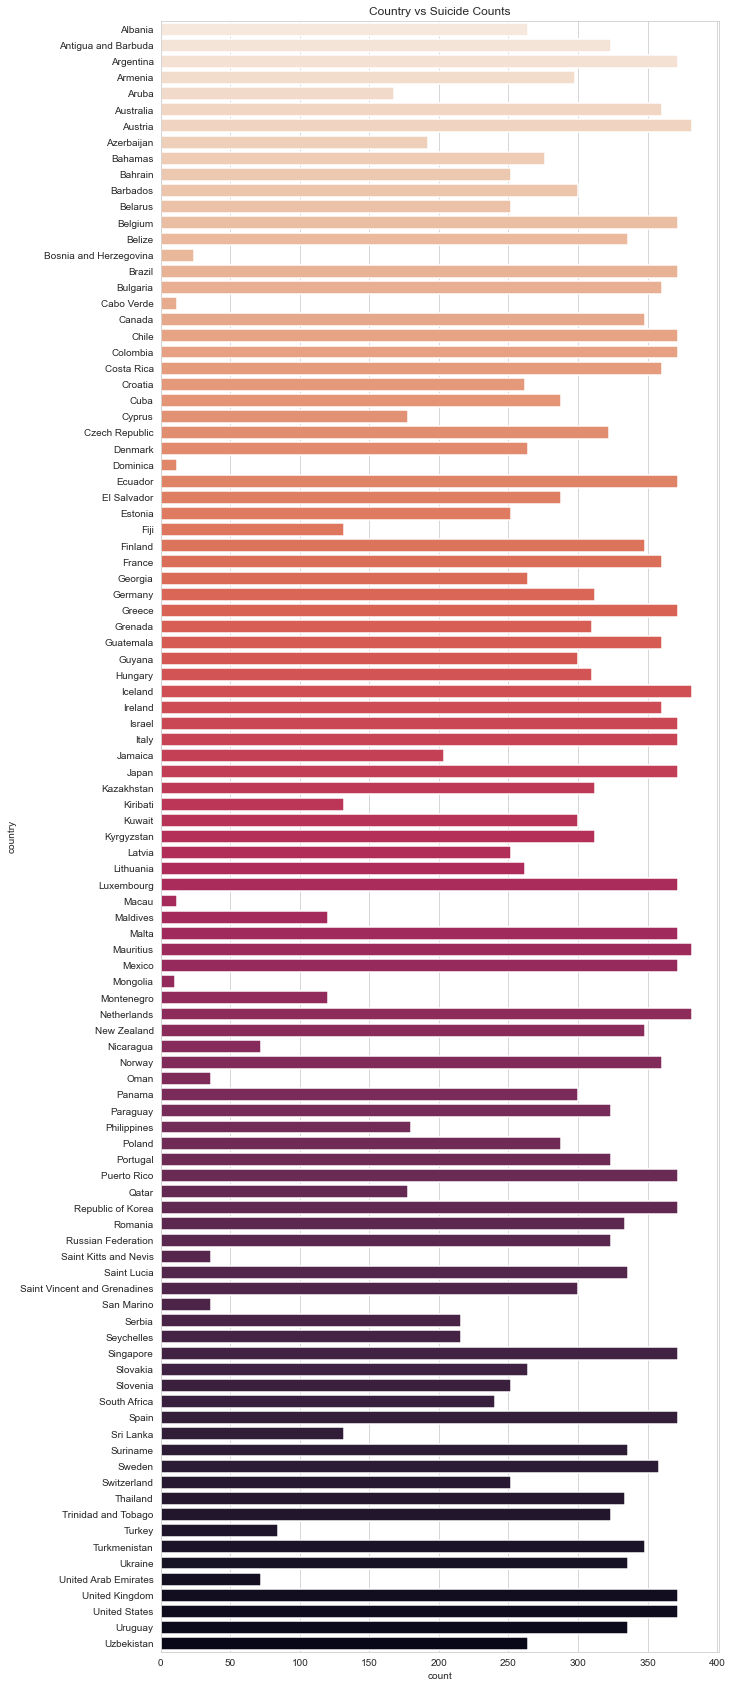

In [11]:
#Visualising Country vs Suicide Count data
sns.set_style("whitegrid")
alpha = 1
plt.figure(figsize=(10,30))
sns.countplot(y='country', data=df, alpha=alpha, linewidth=1.5, palette="rocket_r")
plt.title('Country vs Suicide Counts')
plt.show()

In [12]:
df["sex"].value_counts()

female    13910
male      13910
Name: sex, dtype: int64

Text(0.5, 1.0, 'Gender vs Suicide Count')

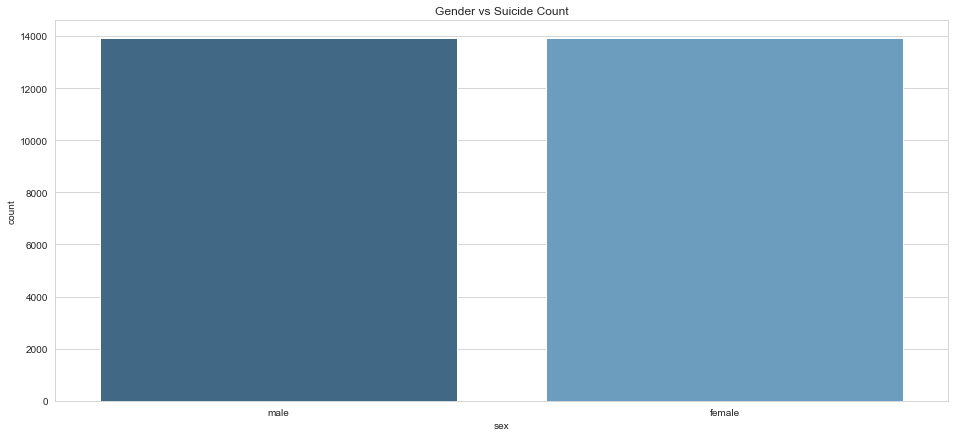

In [13]:
#visualising suicide count vs gender
plt.figure(figsize=(16,7))
sns.countplot(x='sex', data=df, alpha=alpha, linewidth=1, palette="Blues_d")
plt.title('Gender vs Suicide Count')

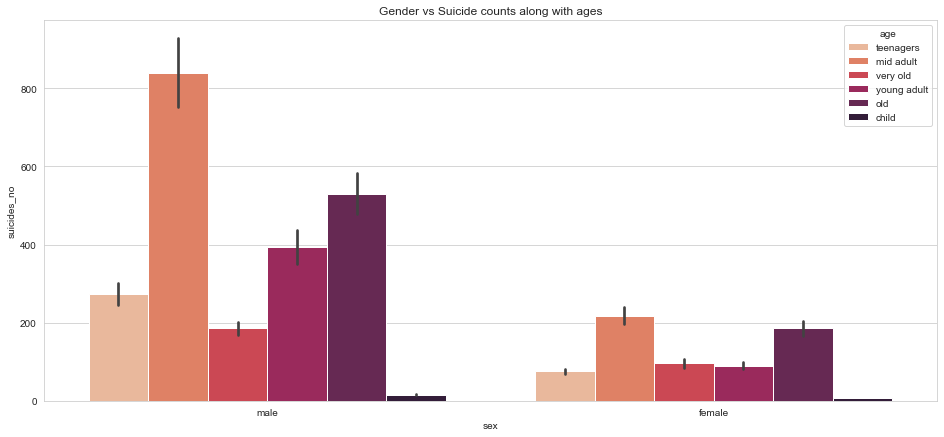

In [14]:
plt.figure(figsize=(16,7))
graph1 = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'age',palette="rocket_r",data = df)
plt.title('Gender vs Suicide counts along with ages')
plt.show()

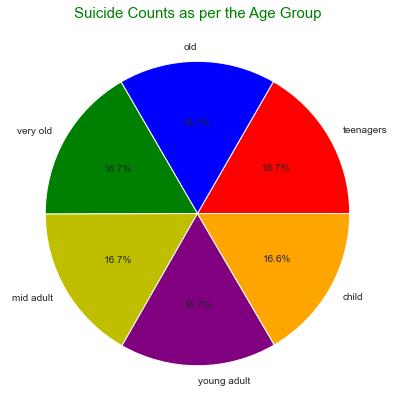

In [15]:
df.age.dropna(inplace = True)
labels = df.age.value_counts().index
colors = ['r','b','g','y','purple','orange']
explode = [0,0,0,0,0,0]
sizes = df.age.value_counts().values
plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Suicide Counts as per the Age Group',color = 'Green',fontsize = 15)
plt.show()

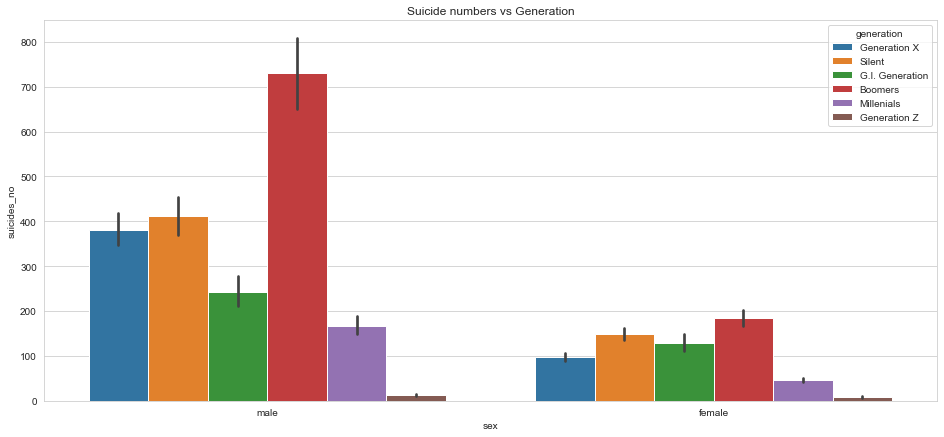

In [16]:
plt.figure(figsize=(16,7))
bar_gen = sns.barplot(x = 'sex', y = 'suicides_no', hue = 'generation',data = df)
plt.title('Suicide numbers vs Generation')
plt.show()

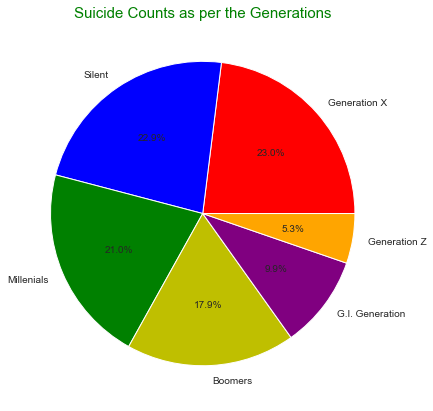

In [17]:
df.generation.dropna(inplace = True)
labels = df.generation.value_counts().index
colors = ['r','b','g','y','purple','orange']
explode = [0,0,0,0,0,0]
sizes = df.generation.value_counts().values
plt.figure(0,figsize = (7,7))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%')
plt.title('Suicide Counts as per the Generations',color = 'Green',fontsize = 15)
plt.show()

### Top countries with highest suicide counts as per age.

In [18]:
#top countries with highest suicide counts as per the age
df_age = df.sort_values(by=["suicides_no","age"], ascending=False)
df_age.reset_index(inplace=True,drop=True)
df_age.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Russian Federation,1994,male,mid adult,22338,19044200,117.30,"3,95,07,73,01,248",2853,Boomers
1,Russian Federation,1995,male,mid adult,21706,19249600,112.76,"3,95,53,10,66,563",2844,Boomers
2,Russian Federation,2001,male,mid adult,21262,21476420,99.00,"3,06,60,26,73,980",2229,Boomers
3,Russian Federation,2000,male,mid adult,21063,21378098,98.53,"2,59,70,84,96,267",1879,Boomers
4,Russian Federation,1999,male,mid adult,20705,21016400,98.52,"1,95,90,57,67,669",1412,Boomers


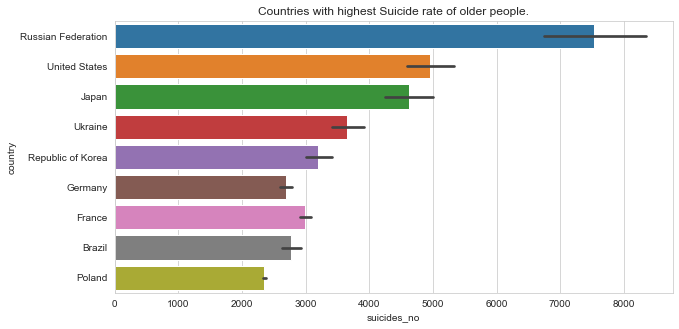

In [19]:
plt.figure(figsize=(10,5))
sns.barplot(df_age.suicides_no[:600],df_age.country[:600])
plt.title("Countries with highest Suicide rate of older people.")
plt.show()

(array([0, 1, 2, 3, 4]), <a list of 5 Text major ticklabel objects>)

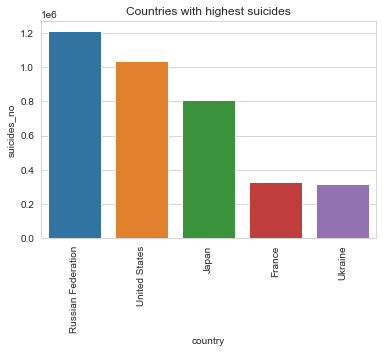

In [20]:
country_suicide = df[['country','suicides_no']].groupby(['country']).sum()
country_suicide = country_suicide.reset_index().sort_values(by='suicides_no', ascending=False)
top = country_suicide[:5]
sns.barplot(x='country', y='suicides_no', data=top).set_title('Countries with highest suicides')
plt.xticks(rotation=90)

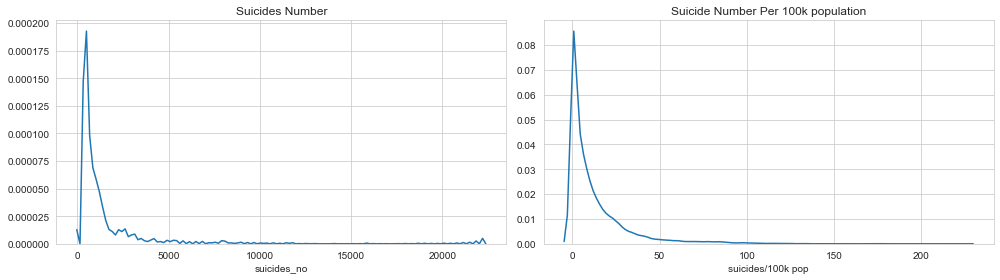

In [21]:
plt.figure(figsize=(14,4))
plt.subplot(121)
plt.title('Suicides Number')
sns.distplot(df['suicides_no'], hist=False)
plt.subplot(122)
plt.title('Suicide Number Per 100k population')
sns.distplot(df['suicides/100k pop'], hist=False)
plt.tight_layout()

# Data Analysis for suicide count in Canada over the years

In [22]:
df.country.unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Mongolia', 'Montenegro', 'Netherlands',
       'New Zealand', 'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay',
       'Philippines', 'Poland', 'Portugal', 'Puerto Rico', 'Qatar',
       'Republic of Korea', 'Romania', '

In [23]:
df_canada = df[df['country'] == 'Canada']

In [24]:
df_canada = df_canada.reset_index(drop= True) ##setting index from 0 onwards.

In [25]:
df_canada.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Canada,1985,male,very old,111,390200,28.45,"3,64,75,64,99,451",15522,G.I. Generation
1,Canada,1985,male,old,502,1841000,27.27,"3,64,75,64,99,451",15522,G.I. Generation
2,Canada,1985,male,young adult,605,2240500,27.00,"3,64,75,64,99,451",15522,Boomers
3,Canada,1985,male,mid adult,774,3046800,25.40,"3,64,75,64,99,451",15522,Silent
4,Canada,1985,male,teenagers,560,2224600,25.17,"3,64,75,64,99,451",15522,Generation X


In [26]:
df_canada[(df_canada['year'] == 1985) & (df_canada['age'] == 'very old')]

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Canada,1985,male,very old,111,390200,28.45,"3,64,75,64,99,451",15522,G.I. Generation
8,Canada,1985,female,very old,34,642900,5.29,"3,64,75,64,99,451",15522,G.I. Generation


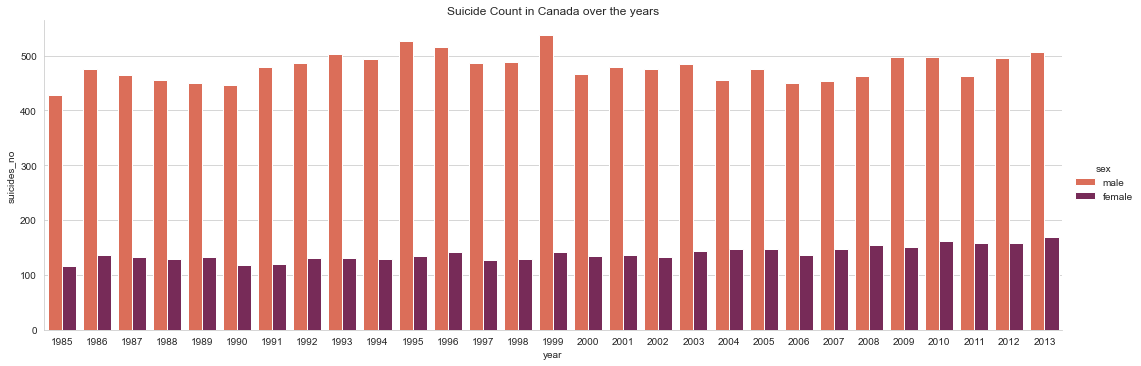

In [27]:
sns.catplot(
    data=df_canada, kind="bar",
    x="year", y="suicides_no", hue="sex",
    ci= None, palette="rocket_r",height=5, aspect= 3
)
plt.title('Suicide Count in Canada over the years')
plt.show()

Text(0.5, 1.0, 'Male vs Female Suicide Counts as per aggregate mean count')

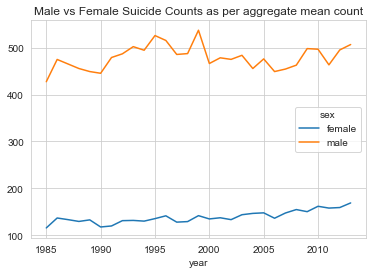

In [28]:
df_group = df_canada.groupby(['year','sex'])['suicides_no'].mean().unstack().plot() 
plt.title("Male vs Female Suicide Counts as per aggregate mean count")

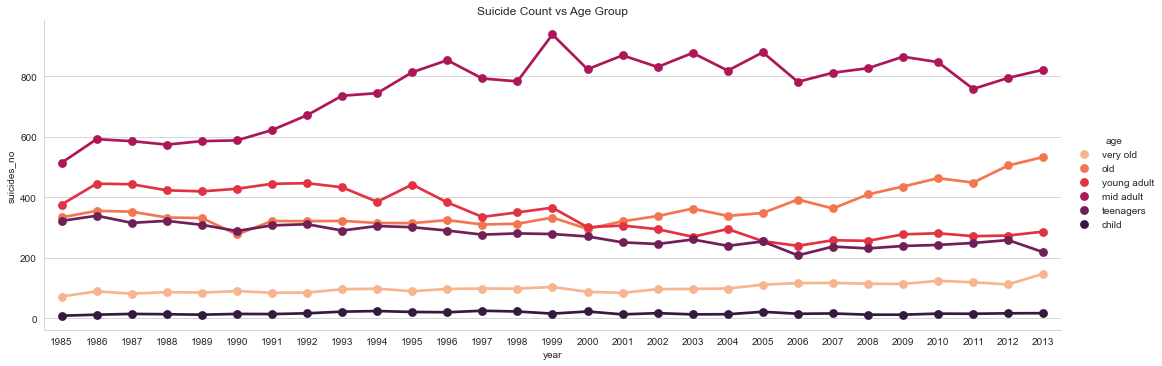

In [29]:
sns.catplot(
    data=df_canada, kind="point",
    x="year", y="suicides_no", hue="age",
    ci= None, palette="rocket_r",height=5, aspect= 3
)
plt.title('Suicide Count vs Age Group')
plt.show()

## Prediction of number of suicides that may happen, given the population of country

In [30]:
df.describe()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
count,27820.000000,27820.000000,2.782000e+04,27820.000000,27820.000000
mean,2001.258375,242.574407,1.844794e+06,12.816097,16866.464414
std,8.469055,902.047917,3.911779e+06,18.961511,18887.576472
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1995.000000,3.000000,9.749850e+04,0.920000,3447.000000
50%,2002.000000,25.000000,4.301500e+05,5.990000,9372.000000
75%,2008.000000,131.000000,1.486143e+06,16.620000,24874.000000
max,2016.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [31]:
df.corr()

,year,suicides_no,population,suicides/100k pop,gdp_per_capita ($)
year,1.000000,-0.004546,0.008850,-0.039037,0.339134
suicides_no,-0.004546,1.000000,0.616162,0.306604,0.061330
population,0.008850,0.616162,1.000000,0.008285,0.081510
suicides/100k pop,-0.039037,0.306604,0.008285,1.000000,0.001785
gdp_per_capita ($),0.339134,0.061330,0.081510,0.001785,1.000000


<Figure size 1440x360 with 0 Axes>

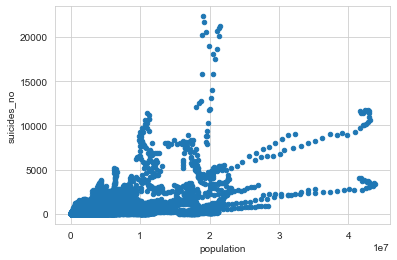

<Figure size 1440x360 with 0 Axes>

In [55]:
df.plot.scatter('population','suicides_no')
plt.figure(figsize=(20,5))

In [47]:
from sklearn.linear_model import LinearRegression


In [49]:
linear_reg=LinearRegression()

x=df.population.values.reshape(-1,1)
y=df.suicides_no.values.reshape(-1,1)

linear_reg.fit(x,y)

b0 =linear_reg.intercept_
b1=linear_reg.coef_
print("b0:",b0)
print("b1:",b1)
print("Prediction 5M:",linear_reg.predict([[5000000]]))
print("Prediction 10M:",linear_reg.predict([[10000000]]))
print("Prediction 15M:",linear_reg.predict([[15000000]]))

b0: [-19.54437126]
b1: [[0.00014209]]
Prediction 5M: [[690.88408992]]
Prediction 10M: [[1401.31255109]]
Prediction 15M: [[2111.74101226]]


In [51]:
df.population.min()


278

In [52]:
df.population.max()

43805214

In [53]:
array=np.array([278,5000000,10000000,15000000,20000000,45000000,80000000]).reshape(-1,1)
y_head=linear_reg.predict(array)
print("y_head:",y_head)

y_head: [[  -19.50487143]
 [  690.88408992]
 [ 1401.31255109]
 [ 2111.74101226]
 [ 2822.16947343]
 [ 6374.31177929]
 [11347.31100748]]


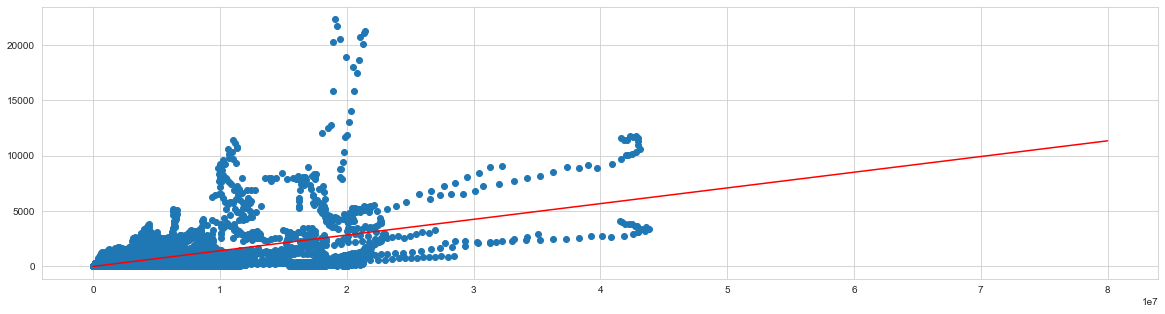

In [54]:
plt.figure(figsize=(20,5))
plt.scatter(x,y)
plt.plot(array,y_head,color='r')
plt.show()